# STATISTICS FUNDAMENTALS, PART1

# WHEN YOU COME TO CLASS
- Open Jupyter Notebook
- Download and open DS-DC-14_03-statistics-fundamentals-part-1
  - Located in lesson 03
  - If you have git working feel free to use git pull
- Go to `File > Make a copy` and save a new copy of the notebook with your initials in the name

## PRE WORK FROM LAST CLASS

- Create and open an iPython Notebook
- Complete the Python pre-work
- Unit 1 Project is due
- Read the about the bias-variance trade-off

## COMMENTS ON THE READING
- How difficult did you find it?
- Can anyone state the main idea in their own words?
- Don't worry, we'll look at the topic several time, and finally cover it formally around lesson 11

## LEARNING OBJECTIVES

- Use NumPy and Pandas libraries to analyze datasets using basic summary statistics: mean, median, mode, max, min, quartile, inter-quartile range, variance, standard deviation, and correlation

- Create data visualizations - including: scatter plots, box plots, and histograms- to discern characteristics and trends in a dataset

- Identify a normal distribution within a dataset using summary statistics and visualization

- ID variable types and complete dummy coding by hand

## WHERE ARE WE IN THE DATA SCIENCE WORKFLOW?

![Data Science Workflow](../lesson-01/assets/images/data-science-workflow-final.jpg)

## HOW DO WE PARSE DATA?


##### CODEALONG
Objective: Read in the Titanic data and look at a few summary statistics

In [1]:
# import Pandas
import pandas as pd

In [3]:
# If you don't have git use this link: http://bit.ly/2ae8zAT
#titanic = pd.read_csv('http://bit.ly/2ae8zAT')
titanic = pd.read_csv('http://bit.ly/2ae8zAT')

In [4]:
# Preview columns
titanic.columns

Index([u'survived', u'pclass', u'name', u'sex', u'age', u'sibsp', u'parch',
       u'ticket', u'fare', u'cabin', u'embarked'],
      dtype='object')

In [5]:
# Preview data dimensions
titanic.shape

(891, 11)

In [6]:
# What are the column data types?
titanic.dtypes

survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

In [7]:
# Look at the first 5 rows
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Can we preview the plcass variable?
titanic.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [9]:
# Pull up descriptive statistics for each variables
titanic.describe()

C:\Users\korol_000\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# Uh-oh it looks like we have missing ages, check these.
titanic.age.isnull().value_counts()


False    714
True     177
Name: age, dtype: int64

In [14]:
# We only have a few missing values, so let's just get rid of these rows
titanic=titanic.dropna(subset=['age'])
# Double check


In [15]:
titanic.age.isnull().value_counts()

False    714
Name: age, dtype: int64

In [16]:
titanic.shape

(714, 11)

## STATISTICS FUNDAMENTALS
Objective: Becoming familiar with mean, median, mode, interquartile-range, variance, and standard deviation in Pandas

#### A QUICK REVIEW OF NOTATION

The sum of a constant, k,  n times
$$\sum_{i=1}^nk$$

In [ ]:
4+4+4+4

The sum of all numbers from 1 up to n:
$$\sum_{i=1}^ni$$

In [ ]:
1+2+3+4...n

The sum of all x from the first x entry to the nth x entry:
$$\sum_{i=0}^nx_i$$

In [17]:
titanic.age[0]+titanic.age[1]+titanic.age[2]

86.0

##### Exercise

In [34]:
# Compute the sum of 7 4s

print "Sum of 7 4s:", sum([4,4,4,4,4,4,4])

# Compute the sum of 1 through 10
print "Sum of 1 through 10:", sum(range(1,11))

# Using the titanic.fare column compute the total fare paid by passengers
print "Total fare using Python:", sum(titanic.fare)
print "Total fare using Pandas:", titanic.fare.sum()

Sum of 7 4s: 28
Sum of 1 through 10: 55
Total fare using Python: 24771.883
Total fare using Pandas: 24771.883


#### MEASURES OF CENTRAL TENDENCY

- mean
- median
- mode

#### MEAN
The mean, also known as an average or the expected value is defined as:
$$E[X] = \bar{X} =\frac 1n\sum_{i=1}^nx_i$$

#### MEDIAN
The median refers to the midpoint in a series of numbers.

$$ 0,1,2,[3],5,5,9 $$

$$ 1,3,4,[4,5],5,5,7 $$

To find the median:
- Arrange the numbers in order smallest to 
  largest.

- If there is an odd number of values, the 
  middle value is the median.

- If there is an even number of values, the 
  average of the middle two values is the 
  median.


#### MODE
The mode of a set of values is the value that occurs most often.
A set of values may have more than one mode or no mode.

$$1,0,1,5,7,8,9,3,4,1$$ 1 is the mode since it occurs the most often

##### Exercise

In [42]:
# Find the mean of the titanic.fare series using base Python
print "Mean titanic fare:", float(sum(titanic.fare))/len(titanic.fare)

# Find the mean of the titanic.fare series using Pandas
print "Mean titanic fare:", titanic.fare.mean()

# What was the median fare paid (using Pandas)?
print "Median titanic fare:", titanic.fare.median()

# The mean and median are not the same, does this tell you anything about the fares?
# Discuss it with someone at your table

# Use Pandas to find the most common fare paid on the Titanic
print "The most common fare is:", titanic.fare.mode()[0]

Mean titanic fare: 34.6945140056
Mean titanic fare: 34.6945140056
Median titanic fare: 15.7417
The most common fare is: 13.0


In [46]:
titanic.fare.value_counts().head()

13.0000    41
26.0000    30
8.0500     29
10.5000    24
7.8958     23
Name: fare, dtype: int64

##### REAL WORLD APPLICATION - Preview data and temporarily clean up missing values

- Whenever you get a new dataset, the fastest way to find mistakes and inconsistencies is to look at the descriptive statistics
  - If anything look too high or too low relative to your experience, there may be issues with the data collection
- Your data may have a lot of missing values and may need to be cleaned meticulously before being combined with other data
  - You can take a quick average or moving average to smooth out the data and combine that to preview your results before you embark on your much longer data cleaning journey
  - Sometimes filling in missing values with their means or medians will be the best solution for dealing with missing data other times you may want to drop the offending rows

## SUMMARY STATISTICS IN PANDAS

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

# This makes sure that graphs render in your notebook
%matplotlib inline 

##### CODEALONG
Objective: Become familiar with basic statistics in Pandas

### Basic Stats

Methods available include: 
- .min() - Compute minimum value
- .max() - Compute maximum value
- .mean() - Compute mean value
- .median() - Compute median value
- .mode() - Compute mode value(s)
- .count() - Count the number of observations

In [48]:
# Calculate the mean for all numeric variables in the titanic dataset
titanic.mean()

survived     0.406162
pclass       2.236695
age         29.699118
sibsp        0.512605
parch        0.431373
fare        34.694514
dtype: float64

##### KNOWLEDGE CHECK

In [60]:
# How do I find the youngest passenger on the Titanic?
print "Youngest:", titanic.age.min()

# How do I find the oldest passenger on the Titanic?
print "Oldest:", titanic.age.max()

# How do I find the middle age?
print "Median:", titanic.age.median()

# What is the most common age on the ship?
print "Most common age is:", titanic.age.mode()

# Bonus: How do I find the name of the oldest passenger?
titanic.sort_values('age', ascending=False).head()
titanic[titanic.age>70.0].age.min()
titanic[titanic.age==titanic.age.max()]

Youngest: 0.42
Oldest: 80.0
Median: 28.0
Most common age is: 0    24.0
dtype: float64


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


### Part 2. QUARTILES AND INTERQUARTILE RANGE

Quartiles divide a rank-ordered data set into four equal parts.

The values that divide each part are called first, second, and third quartiles, denoted Q1, Q2, and Q3, respectively.

The interquartile range (IQR) is Q3 - Q1, a measure of variability.

![interquartile range](assets/images/interquartile-range.gif)

##### STOP AND THINK
Take 30 seconds to consider the following:

Why do we use Q1 and Q3 to measure variability instead of the min and max?

In [ ]:
# Q2 is the same as the median
print "50% Quartile:"
print titanic.quantile(.50) 
print "Median (red line of the box)"
print titanic.median()

In [ ]:
print"25% (bottome of the box)"
print titanic.quantile(0.25)
print"75% (top of the box)"
print titanic.quantile(0.75)

##### KNOWLEDGE CHECK

In [61]:
# Take a minute or to answer the following
# Compute the interquartile-range of titanic fares
print "IQR of fares:", titanic.fare.quantile(0.75)-titanic.fare.quantile(0.25)

IQR of fares: 25.325


##### CODEALONG - How to visualize quartiles
Objective: Demonstrate how to create various types of boxplots

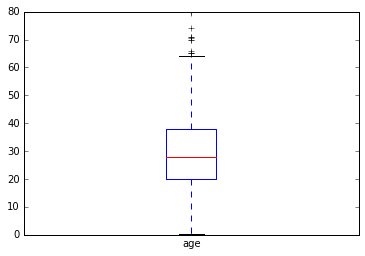

In [63]:
# Plot a boxplot of age using plot
titanic.age.plot(kind='box')


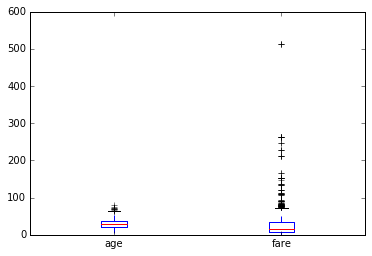

In [67]:
# Plot a boxplot of age and fare using plot
titanic[['age','fare']].plot(kind='box')

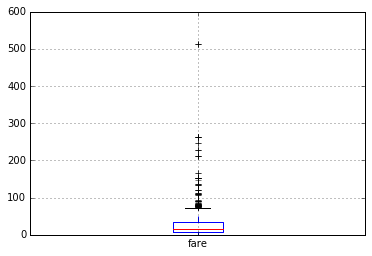

In [70]:
# Plot a boxplot of fare using boxplot
titanic.boxplot(column='fare',return_type='axes')

##### MATH REVIEW
**How do we measure distance?**

One method is two take the difference between two points
$$X_2 - X_1$$

However, this can be inconvenient due to negative numbers.

We often use this square root trick to deal with negative numbers
$$\sqrt{(X_2-X_1)^2}$$

**What about distance in multiple dimensions?**

We can turn to the Pythagorean theorem
$$a^2 + b^2 = c^2$$

To find the distance along a diagnal it is sufficient to measure one dimension at a time
$$\sqrt{a^2 + b^2} = c$$

More generally we can write this as (You'll see this in machine learning papers)
$$\|X\|_2 = \sqrt{\sum{x_i^2}} = c$$

If we want to work with points rather than distances, we can write
$$\sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2} = c$$
or
$$\sqrt{\sum{(x_i - y_i)^2}} = c$$

##### KNOWLEDGE CHECK

In [ ]:
# How much younger is the youngest person on the titanic compared to the average person on the titanic?


In [ ]:
# Use the square root trick to make sure we have a positive distance


### STANDARD DEVIATION & VARIANCE

Standard deviation (SD, σ for population, s for sample)  is a measure that is used to quantify the amount of variation or dispersion of a set of data values.

Standard deviation is the square root of variance.
$$variance = \frac {\sum{(x_i - \bar{X})^2}} {n-1}$$

$$s = \sqrt{\frac {\sum{(x_i - \bar{X})^2}} {n-1}}$$

That can be a lot to take in so let's break it down in Python

In [71]:
# Take the first 5 rows of titanic age data
first_five = titanic.age[:5]
print first_five

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64


In [72]:
# Get the mean of the 5 observations
mean = first_five.mean()
print mean

31.2


In [73]:
# Find the squared distance for each observation
dis0 = (first_five[0] - mean)**2
dis1 = (first_five[1] - mean)**2
dis2 = (first_five[2] - mean)**2
dis3 = (first_five[3] - mean)**2
dis4 = (first_five[4] - mean)**2

squared_distances = [dis0, dis1, dis2, dis3, dis4]

print "Sum of Squares distances:", sum(squared_distances)

Sum of Squares distances: 186.8


In [75]:
numerator = sum(squared_distances)
denominator = 5 - 1
variance = numerator/denominator
standard_deviation = np.sqrt(variance) 
print "Numerator:", numerator 
print "Denominator:", denominator
print "Variance", variance
print "STD:", standard_deviation

Numerator: 186.8
Denominator: 4
Variance 46.7
STD: 6.83373982531


In [76]:
# More simply in pandas
print first_five.var()
print first_five.std()

46.7
6.83373982531


##### REAL WORLD APPLICATION - STOCK MARKET RETURNS AND FEATURE ENGINEERING
- Generally, you cannot predict the price of a stock because most predictive information is already accounted for in the pricing
- However, there is a well known relationship between the riskiness of a stock and the expected return
- If you simply take the historic prices for several stocks and try to predict the expected returns for a period in the future, most algorithms won't give you good results
- What you can do is use the current S&P 500 return and the historic standard deviation of each stock as a crude measure of riskiness and some algorithms will pick up on the association between risk and expected return
- This is effectively predicting the present, but has important applications for portfolio management

### A SHORT INTRO TO BIAS AND VARIANCE (There will be more intros)

In simple terms, **Bias** shows how on target a model is in its predictions.

**Variance** shows how reliable a model in its performance.

These characteristics have important interactions, but we will save that for later.

![Bias and Variance](assets/images/biasVsVarianceImage.png)

In the following notation $f$ refers to a perfect model while $\hat{f}$ refers to our model.

**Bias**

Error due to bias is calculated at the difference between the expected prediction of our model and the correct value we are trying to predict.
$$Bias = E[\hat{f}(x)] - f(x)$$

**Variance**

Error due to variance is taken as the variability of a model prediction for a given point.

$$Variance = E[(\hat{f}(x) - E[\hat{f}(x)])^2]$$

##### Any burning questions that you want answered right now? We will cover this in further depth in other lessons.

### CORRELATION
The correlation measures the extent of interdependence of variable quantities.

Typical when we talk about the pearson correlation coefficient which is a measure of **linear** association

We refer to perfect correlation as colinearity

![Example correlation values](assets/images/correlation_examples.png)

##### CODEALONG - Correlation in Pandas
Objective: Explore options for measuring and visualizing correlation in Pandas

In [77]:
# Display the correlation matrix for all titanic variables
titanic.corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189
pclass,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329
parch,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119
fare,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000


In [79]:
# Show the correlation of just survived and fare
titanic[['survived','fare']].corr()

,survived,fare
survived,1.000000,0.268189
fare,0.268189,1.000000


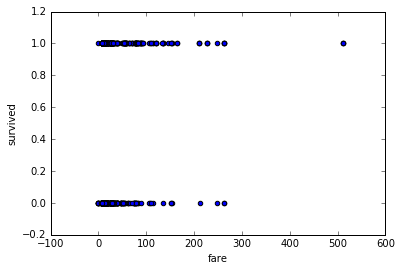

In [80]:
# Take a closer look at survived and fare using a scatter plot
titanic.plot(kind='scatter', y='survived', x='fare')

# Is correlation a good way to inspect the association of fare and survival?

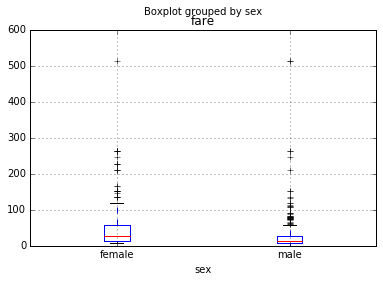

In [82]:
titanic.boxplot(column='fare', by='sex')

# IS THIS NORMAL?
Objective: Introduce normal (gaussian distributions)

#####  Math Review
- What is an event space?
  - A listing of all possible occurances
- What is a probability distribution?
  - A function that describes how events occur in an event space
- What are general properties of probability distributions?
  - All probabilities of an event are between 0 and 1
  - The probability that something occurs is almost certain or 1.
  

##### THE NORMAL DISTRIBUTION
- A normal distribution is often a key assumption to many models.
  - In practice if the normal distribution assumption is not met, it's not the end of the world. Your model is just a bit less efficient in most cases.

- The normal distribution depends upon the mean and the standard deviation.

- The mean determines the center of the distribution.  The standard deviation determines the height and width of the distribution.

- Normal distributions are symmetric, bell-shaped curves.

- When the standard deviation is large, the curve is short and wide.

- When the standard deviation is small, the curve it tall and narrow.

![normal distribution](assets/images/normal.png)


##### WHY DO WE THINK ABOUT NORMAL DISTRIBUTIONS?
- Show up in nature very often
- Aggregated processes tend to distribute normally regardless of their underlying distribution provided that the processes are uncorrelated or weakly correlated (Central Limit Theorem)
- Good simplification that makes it easy to make approximations - good enough for government work

#####  SKEWNESS
- Skewness is a measure of the asymmetry of the distribution of a random variable about its mean.
- Skewness can be positive or negative, or even undefined.
- Notice that the mean, median, and mode are the same when there is no skew
![skewness](assets/images/skewness---mean-median-mode.jpg)

#####  Real World Application - When mindfullness beats complexity
- Skewness is surprisingly important
- Most algorithms implicitly use the mean by default when making approximations
- If you know your data is heavily skewed you may have to either transform your data or set your algorithms to work with the median
- In the recent DIDI tech challenge, changing a few default options quickly put you in the 80th percentile, ahead of some very brilliant programmers who missed the basics

##### KURTOSIS
- Kurtosis is a measure of whether the data are peaked or flat relative to a normal distribution.
- Datasets with high kurtosis tend to have a distinct peak near the mean, decline rather rapidly, and have heavy tails. 

![kurtosis](assets/images/kurtosis.jpg)

#####  Real World Application - Risk Analysis
- Long-tailed distributions with high kurtosis elude intuition, we naturally think the event is too improbable to pay attention to
- It's often the case that there is a a large cost associated with the very low probability event as is the case with hurricane damage
- It's unlikely you will get hit by a category 5 hurricane, but when you do, the damage is catastrophic
- Pay attention to what happens at the tails and whether it influences the problem at hand

## DETERMINING THE DISTRIBUTION OF YOUR DATA

Objective: Introduce histograms and density plots in Pandas

##### CODEALONG

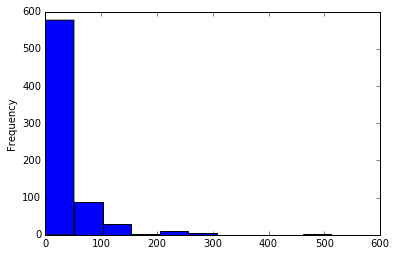

In [83]:
# Histograms split the data into even bins and count how many observations fall in each bin
titanic.fare.plot(kind='hist')

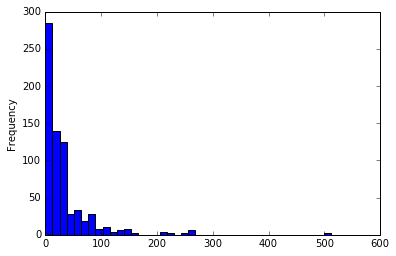

In [84]:
# Density plots use a sophisticated formula to create a smooth histogram
titanic.fare.plot(kind='hist',bins=40)

# Notice the apparent negative values

##### Exercise

In [ ]:
# Look at the fare variables in the titanic dataset
# Is it normal?
# Is it skewed?


# The default number of bins makes it hard to look at the fares data, 
# use the documentation and help files to increase the number of bins


# Check the skewness and kurtosis of the fare variable
print "Skewness:", 
print "Kurtosis:", 

## VARIABLE TYPES
Objective: Look at categorical variables and learn dummy encoding

So far we've looked at continuous numerical variables, but what about the survived and passenger class variables?

##### CODEALONG

In [85]:
# Look at the value counts of passenger class (pclass)
titanic.pclass.value_counts()

3    355
1    186
2    173
Name: pclass, dtype: int64

##### STOP AND THINK
Take a minute to think about the following
- Does the mean signify anything in this case?
- What is the mode?
- pclass is encoded as 1 = high, 2 = medium, 3 = low, this is certainly ordered, but is it true that class 1 is twice as high as class 2?
- How can we accurately treat pclass and speak about association with pclass?


##### CODE EXAMPLE - Generating dummy variables from a categorical variable
Objective: Learn syntax and consider the pros and cons of using dummy variables

In [87]:
titanic.pclass.head()

0    3
1    1
2    3
3    1
4    3
Name: pclass, dtype: int64

In [86]:
class_dummies = pd.get_dummies(titanic.pclass, prefix='class')
class_dummies.head()

,class_1,class_2,class_3
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [88]:
titanic = pd.concat([titanic, class_dummies], axis = 1)
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,class_1,class_2,class_3
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0,0.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,0.0,0.0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0,1.0


##### CODEALONG

In [89]:
# Use the Pandas subsetting functionality to look at the class 1 average fare
titanic[titanic.class_1==1.0].fare.mean()

87.96158225806447

In [90]:
# Use the Pandas subsetting functionality to look at the class 3 average fare
titanic[titanic.class_3==1.0].fare.mean()

13.229435211267623

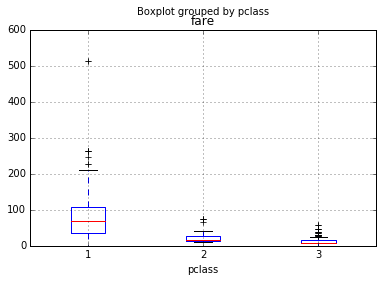

In [92]:
# Graph boxplots of the fare by passenger class
titanic.boxplot(column='fare', by='pclass')

##### Exercise (if there's time)

Repeat the above procedure using embarked and a variable of your choice

# TOPIC REVIEW
Today we looked at:
- Several different types of summary statistics, what are they?
- We covered three different types of visualizations, which ones?
- What are some important characteristics of distributions?

**Any further questions?**

# FURTHER READING
- I would recommend Think Stats (posted in slack under resources)
  - Covers fundamental statistics in a friendly way
  - Uses pandas for code examples

## Pre-work for next class
- Feel free to get started on the Unit two homework (Due Monday)
- If you want a refresher to hypothesis testing check out https://www.khanacademy.org/math/probability/statistics-inferential/hypothesis-testing/v/hypothesis-testing-and-p-values

# EXIT TICKETS
http://goo.gl/forms/gG5qAw9QljgkHC2q1